In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Prueba:
    def __init__(self,DataName):
        '''DataName: String con la dirección y nombre 
           del csv'''
        #Se guardan los datos en el objeto, separando los 
        #numercos de los originales
        self.data  = pd.read_csv(DataName)
        self.NData = pd.read_csv(DataName)._get_numeric_data()
        
        #Se borra los datos de Id 
        self.NData.drop(self.NData.columns[0],axis=1,inplace= True)

        #Se guarda la cantidad de datos en el objeto
        self.LenData = len(self.data) 
        

    def BasicStatistics(self):
        '''Este metodo realiza la estadistica basica de las
           variables númericas y las guarda en un Data frame'''
        #Se encuentra el nombre de las columnas
        self.Name()
        #Se crea un dataframe nuevo
        self.Statistics = pd.DataFrame()
        
        #Se realiza la estadistica por culumna y se agregan los datos
        for name in self.columns_names:
            DataArray = self.NData[name]
            
            media   = DataArray.mean()
            mediana = DataArray.median()
            q25     = DataArray.quantile(0.25)
            q75     = DataArray.quantile(0.75)
            Min     = np.min(DataArray)
            Max     = np.amax(DataArray)

            self.Statistics[name] = [media,mediana,q25,q75,Min,Max]
        #Filas del data Frame 
        self.Statistics.index = ['media','mediana','q25',
                                 'q75','Minimo','Máximo']
    
    def Name(self):
        self.columns_names = self.NData.columns.values
        
    def GE(self,name):
        
        self.BasicStatistics()
        self.OneData = self.Statistics[name]
        
        

        fig, ax = plt.subplots()
        ax.hist(self.NData[name], color = "Darkred")
        ax.set_title(name)
        
        return self.OneData, plt.show(fig)
        

    
    

In [8]:
#Ruta del DataFrame
ruta = '/home/pater/Desktop/CosasPater/UNAL/2023-02NovenoSemestre/IA/Taller1/Iris.csv'
ClassData = Prueba(ruta)
ClassData.NData

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
ClassData.BasicStatistics()
ClassData.Statistics

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
media,5.843333,3.054,3.758667,1.198667
mediana,5.800000,3.000,4.350000,1.300000
q25,5.100000,2.800,1.600000,0.300000
q75,6.400000,3.300,5.100000,1.800000
Minimo,4.300000,2.000,1.000000,0.100000
Máximo,7.900000,4.400,6.900000,2.500000


In [5]:
ClassData.Name()
ClassData.columns_names

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
      dtype=object)

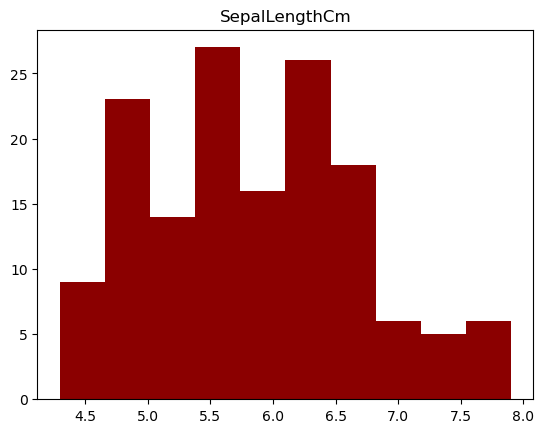

(media      5.843333
 mediana    5.800000
 q25        5.100000
 q75        6.400000
 Minimo     4.300000
 Máximo     7.900000
 Name: SepalLengthCm, dtype: float64,
 None)

In [9]:
ClassData.Name()
names = ClassData.columns_names
ClassData.GE(names[0])